In [17]:
%pylab inline
import sys
sys.path.append('..')
from thulium_library.image_processing import *
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [18]:
print(sys.path)

['', '/Users/artemgolovizin/anaconda/envs/py3k/lib/python33.zip', '/Users/artemgolovizin/anaconda/envs/py3k/lib/python3.3', '/Users/artemgolovizin/anaconda/envs/py3k/lib/python3.3/plat-darwin', '/Users/artemgolovizin/anaconda/envs/py3k/lib/python3.3/lib-dynload', '/Users/artemgolovizin/anaconda/envs/py3k/lib/python3.3/site-packages', '/Users/artemgolovizin/anaconda/envs/py3k/lib/python3.3/site-packages/Sphinx-1.2.3-py3.3.egg', '/Users/artemgolovizin/anaconda/envs/py3k/lib/python3.3/site-packages/aeosa', '/Users/artemgolovizin/anaconda/envs/py3k/lib/python3.3/site-packages/cryptography-0.8-py3.3-macosx-10.5-x86_64.egg', '/Users/artemgolovizin/anaconda/envs/py3k/lib/python3.3/site-packages/nose-1.3.4-py3.3.egg', '/Users/artemgolovizin/anaconda/envs/py3k/lib/python3.3/site-packages/setuptools-14.3-py3.3.egg', '/Users/artemgolovizin/anaconda/envs/py3k/lib/python3.3/site-packages/IPython/extensions', '..', '..']


### Constructing dataD - all data dictionary, then sifting bad images and averaging data to avr_dataD dictionary 

In [2]:
dataD = load_data()

RuntimeError, couldn't find fit for image 300ms/3_1.png
Total number of images:  121
Rearranging to dictionary is complited


In [3]:
sift(dataD)

remove element 1 300ms/1_1.png
remove element 1 300ms/2_1.png
remove element 1 300ms/4_1.png
remove element 0 400ms/10_1.png


In [4]:
avr_dataD = average_data(dataD)

Averaging is complited


### After above, we can analize our data 

####For example, plotting sigma_x and sigma_y for temperature determination: 

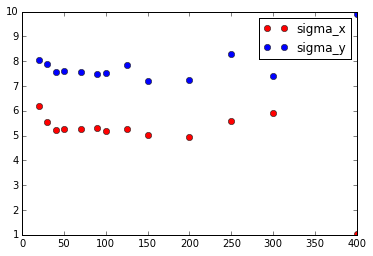

In [5]:
x_data_x,sigma_x = constract_data(avr_dataD, 1, 'x_data_fit',2)
x_data_y,sigma_y = constract_data(avr_dataD, 1, 'y_data_fit',2)
fig_T, ax_T = subplots(1,1)
ax_T.plot(x_data_x, sigma_x, 'ro', label='sigma_x')
ax_T.plot(x_data_y, sigma_y, 'bo', label='sigma_y')
ax_T.legend()

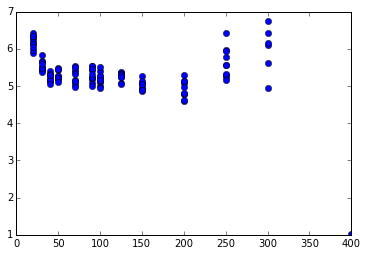

In [6]:
x_data,y_data = constract_data(dataD, 1, 'x_data_fit',2)
plot(x_data, y_data,'o')

In [7]:
norm_dict = normalise_individual_image(dataD, 1, 1, 'total')

(0, 7.0)

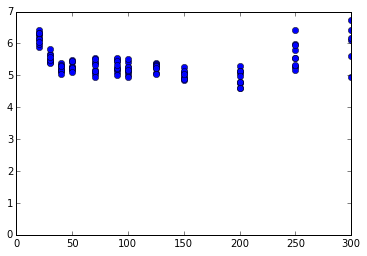

In [14]:
x_data,y_data = constract_data(norm_dict, 1, 'x_data_fit',2)
fig, ax = subplots(1,1)
ax.plot(x_data, y_data,'o',)
ax.set_ylim(bottom=0)

In [15]:
norm_data = normalise_avr_image(avr_dataD, 1, 1, 'total')

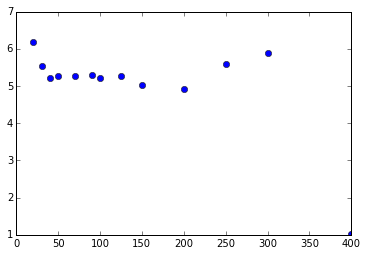

In [16]:
x_data,y_data = constract_data(norm_data, 1, 'x_data_fit',2)
plot(x_data, y_data,'o')
#plot(x_data_x,sigma_x,'o')

[ 400.]
[   5.56268751  165.8554661    -0.1997726 ]


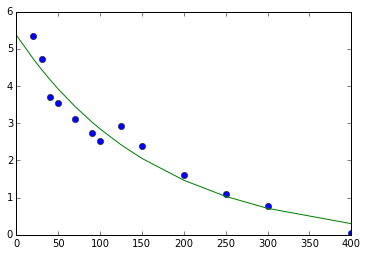

In [12]:
x_data, y_data = constract_data(avr_dataD, 1, 'x_data_fit', 0)
print(x_data[x_data == 400])
plot(x_data, y_data, 'o')
popt, pcov = curve_fit(exp_decay, x_data, y_data, p0=(y_data[0], 100, 0))
print(popt)
x_data_fit = append(x_data,0)
plot(sort(x_data_fit), exp_decay(sort(x_data_fit), *popt))

In [11]:
def exp_decay(t, N0, tau, background):
    return N0 * exp(- t / tau) + background